<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Ch_11_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [49]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [50]:
df = pd.get_dummies(df, columns = ['gender', 'race/ethnicity','parental level of education','lunch','test preparation course'])

In [51]:
df

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [52]:
y = df.iloc[:,:3]
X = df.iloc[:,3:]
X_valid, y_valid = X[:200], y[:200]

In [53]:
y_valid

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
195,61,55,52
196,59,69,65
197,55,56,51
198,45,53,55


In [54]:
from tensorflow import keras
from tensorflow.keras import layers
X.shape

(1000, 17)

In [55]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[17]),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(100,activation='relu', kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(3, activation = 'relu')
                                 ])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 17)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 17)               68        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 300)               5400      
                                                                 
 batch_normalization_5 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_6 (Batc  (None, 100)             

In [57]:
model.compile(loss='mse', optimizer='sgd', metrics = 'accuracy')

In [58]:
history = model.fit(X, y, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 11ms/step - loss: 1032.9810 - accuracy: 0.5120 - val_loss: 750.0168 - val_accuracy: 0.4250
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 208.4294 - accuracy: 0.5980 - val_loss: 372.0905 - val_accuracy: 0.4700
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 184.4264 - accuracy: 0.5990 - val_loss: 252.3779 - val_accuracy: 0.4750
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 184.2903 - accuracy: 0.5960 - val_loss: 443.1605 - val_accuracy: 0.4050
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 198.9320 - accuracy: 0.6040 - val_loss: 441.6852 - val_accuracy: 0.4850
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 183.5697 - accuracy: 0.5820 - val_loss: 178.2504 - val_accuracy: 0.5050
Epoch 7/30
32/32 [==============================] - 0s 4ms/step - loss: 186.7302 - accuracy: 0.6080 - val_loss: 241.8817 - val_accurac

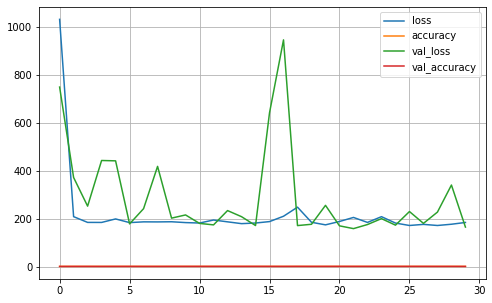

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()


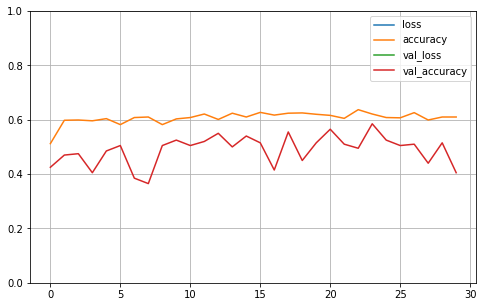

In [60]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [65]:
!pip install functools

  Using cached functools-0.5.tar.gz (4.9 kB)
  ERROR: Failed building wheel for functools
  Running setup.py clean for functools
Failed to build functools
    Running setup.py install for functools ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-4x816223/functools_d74918234ce84f86bc3c45cdb3e33287/setup.py'"'"'; __file__='"'"'/tmp/pip-install-4x816223/functools_d74918234ce84f86bc3c45cdb3e33287/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-7i2in6r4/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/functools Check the logs for full command output.


In [119]:

from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                          activation='relu',
                          kernel_initializer='he_normal',
                          kernel_constraint=keras.constraints.max_norm(1.))


In [120]:

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[0, 17]),
                                 RegularizedDense(300),
                                 RegularizedDense(100),
                                 RegularizedDense(3)
                                 ])

In [121]:
model.compile(loss='mse', optimizer='sgd', metrics = 'accuracy')

In [122]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[0,17]),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(3, activation='relu')
])

In [124]:
model.compile(loss='mse', optimizer='sgd', metrics = 'accuracy')

Epoch 1/30


ValueError: ignored